In [1]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
%config InlineBackend.figure_format = 'retina'

In [6]:
matplotlib.rcParams.update({"font.size": 15})

In [3]:
def change_names(name):
    if name == 'eb20':
        return ''
    if name in ['41', '6', '38']:
        return 'area ' + name
    if name == 'all_true':
        return 'PSZ2(z)+MCXC+ACT'
    return name

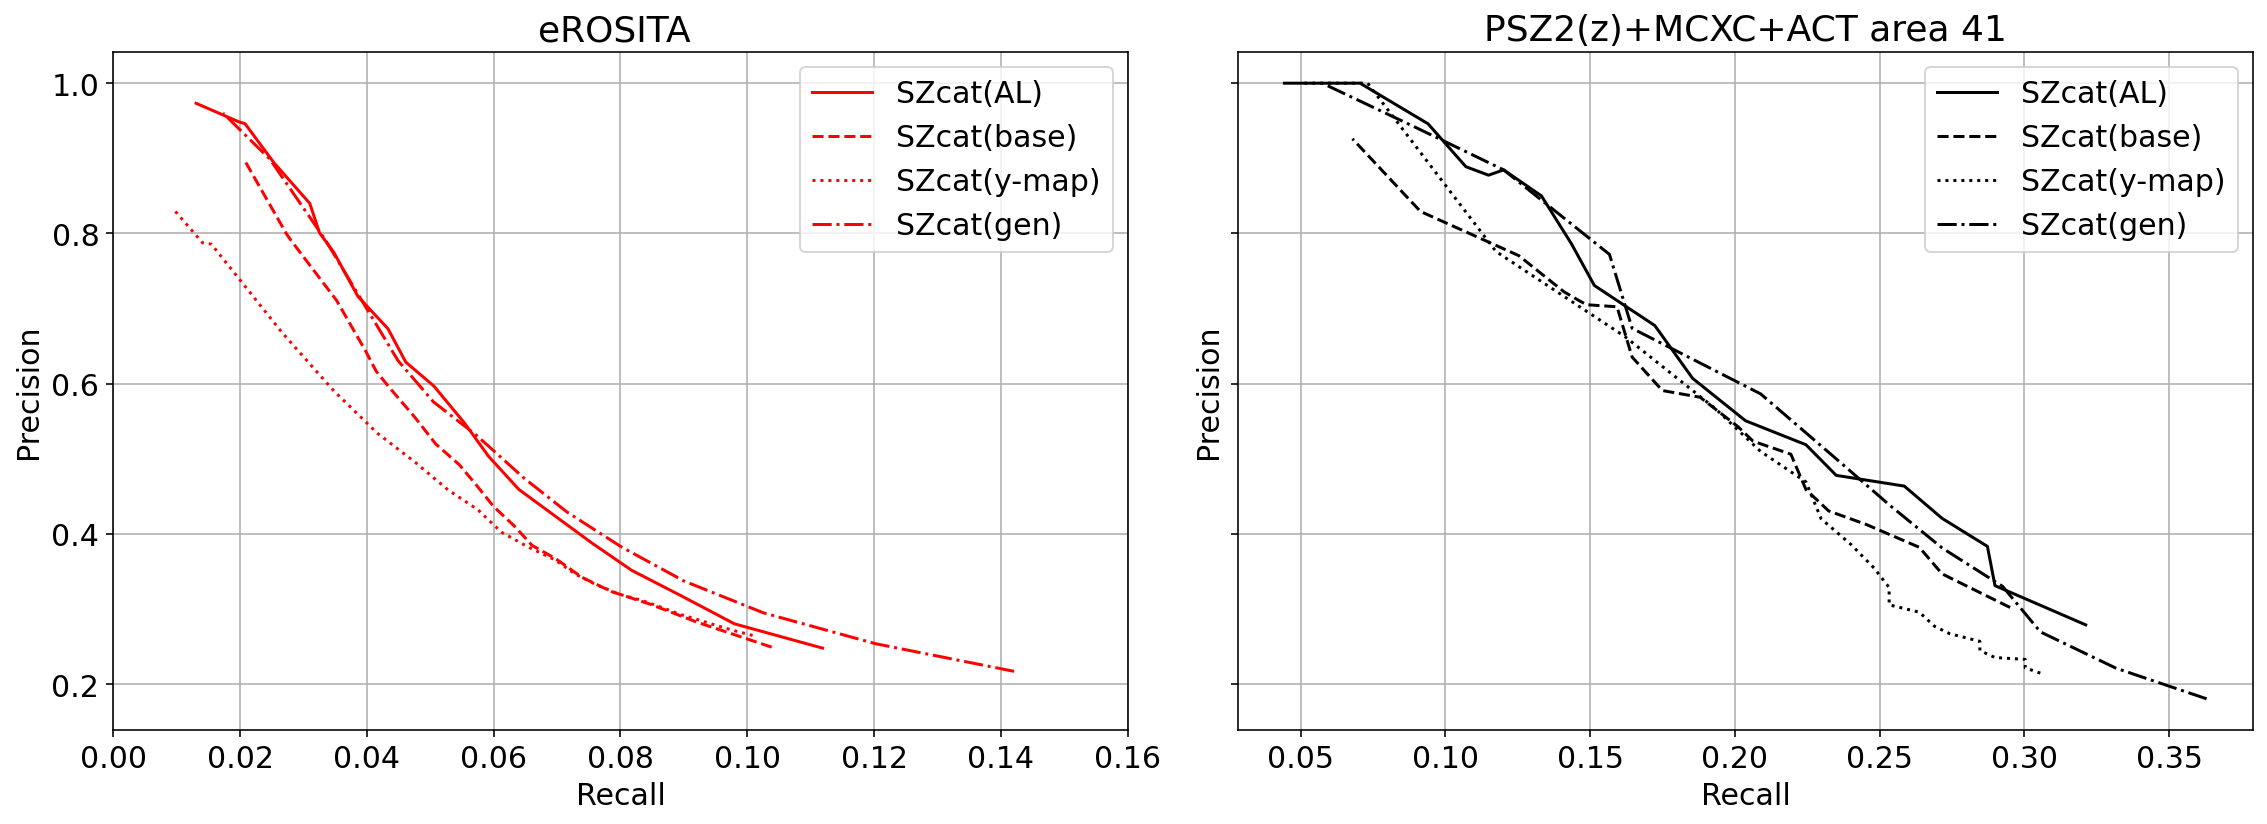

In [7]:
def show_precision_recall(ax, pixname, selected_det, selected_tr=['all_true', 'eROSITA', 'PSZ2(z)'], 
                          colors='krb', alpha=1, linestyles=['-', '--'], index_name='auto',
                         cut_df=None, add_text=''):
    index_auto = {
        'SZcat(base)' : 'max_pred',
        'SZcat(AL)' : 'max_pred',
        'SZcat(y-map)' : 's/n', 
        'SZcat(gen)' : 'mpp_er', 
        'SZcat(AL)_unique' : 'max_pred', 
        'inter' : 'max_pred',
        'inter_sn' : 's/n',
        'SZcat(AL)_unique' : 'max_pred'
    }
    if index_name == 'auto':
        index_name = index_auto[selected_det[0]]
    recalls = {name : pd.read_csv('../check/{}_recall_{}_pix{}.csv'.format(name, index_name.replace('/', ''), pixname))
                  for name in selected_det}
    if not (cut_df is None):
        for name in recalls:
            df = recalls[name]
            df = df[df['mpp'] >= cut_df]
            df.index = np.arange(len(df))
            recalls[name] = df
    for c, recall_prm, prec_prm in zip(colors, ['all_true', 'eROSITA', 'PSZ2(z)'], 
                                       ['precision', 'precision_eROSITA', 'precision_PSZ2(z)']):
        if not (recall_prm in selected_tr):
            continue
        for name_cat, st in zip(recalls, linestyles):
            df = recalls[name_cat]
            s, = ax.plot(df[recall_prm], df[prec_prm], c=c, linestyle=st, alpha=alpha)#, marker='o', markersize=2)
            s.set_label(name_cat)
            ax.set_title(change_names(recall_prm) + ' ' + change_names(pixname) + add_text)
    ax.set_xlabel('Recall')
    ax.set_ylabel('Precision')

fig, ax = plt.subplots(1, 2, figsize=(8 * 2, 6), sharey=True)
for i, pixname, selected_tr, colors in zip([1, 0], ['41', 'eb20'], (['all_true'], ['eROSITA']), ['k', 'br']):
    dets = (['SZcat(AL)', 'SZcat(base)'], ['SZcat(y-map)'], ['SZcat(gen)'])
    lines = (['-', '--'], [':'], ['dashdot'])
    for selected_det, linest in zip(dets, lines):
        show_precision_recall(ax[i], pixname, selected_tr=selected_tr, colors=colors, selected_det=selected_det, linestyles=linest)
ax[0].grid()
ax[0].legend()
ax[1].grid()
ax[1].legend()
ax[0].set_xlim(0, 0.16)

fig.tight_layout()

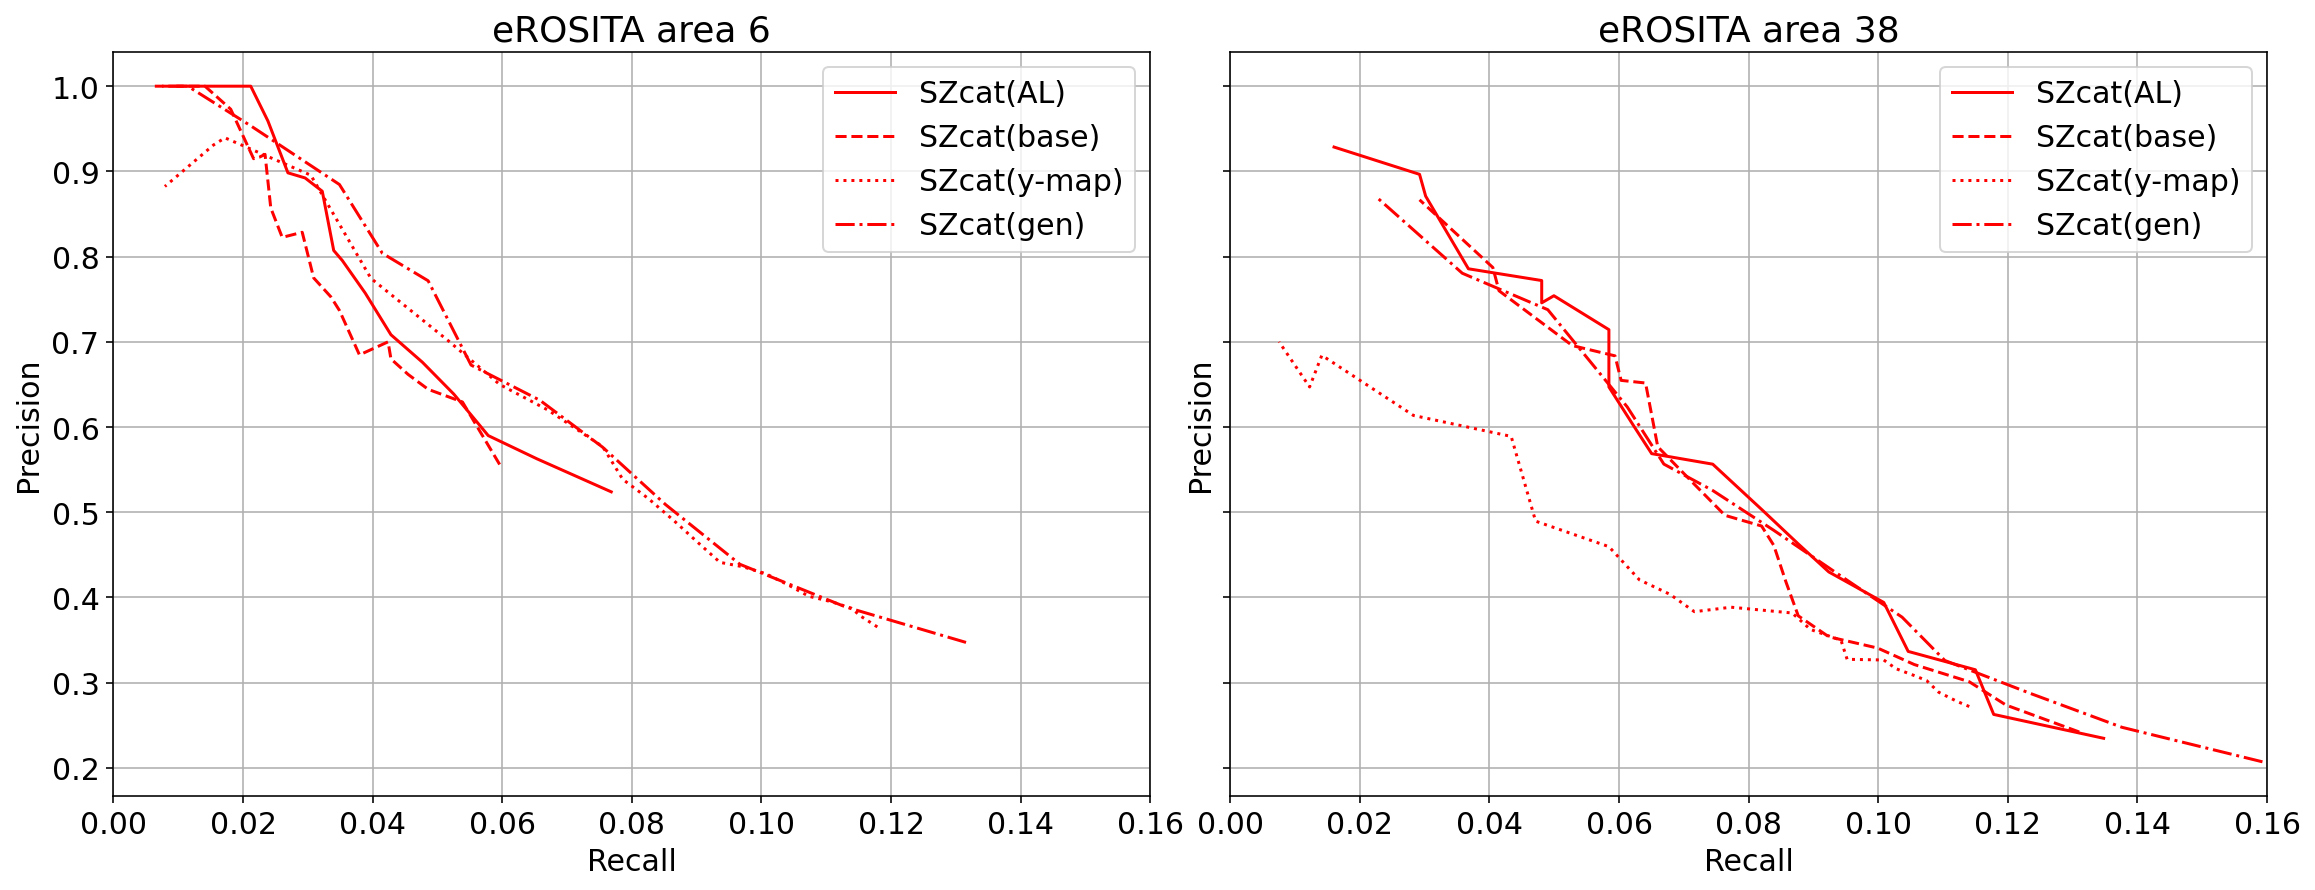

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6), sharey=True)
fig.tight_layout()
for i, pixname in enumerate(['6', '38']):
    tr = (['eROSITA'])
    c = ['br']
    for selected_tr, colors in zip(tr, c):
        dets = (['SZcat(AL)', 'SZcat(base)'], ['SZcat(y-map)'], ['SZcat(gen)'])
        lines = (['-', '--'], [':'], ['dashdot'])
        for selected_det, linest in zip(dets, lines):
            show_precision_recall(ax[i], pixname, selected_tr=selected_tr, colors=colors, selected_det=selected_det, linestyles=linest)
    ax[i].grid()
    ax[i].legend()
    ax[i].set_xlim(0, 0.16)